# Using best value year and quality, look at correlation of high quality pixels

In [1]:
import rioxarray as rxr
import xarray as xr
import numpy as np
#import xrspatial as xrs
import geopandas as gpd
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr

xr.set_options(use_bottleneck = False) # Just found out about this... I wonder if there are any impacts in code?

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from dask.distributed import LocalCluster
cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 100,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:54559,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 100
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:54609,Total threads: 10
Dashboard: http://127.0.0.1:54623/status,Memory: 0 B
Nanny: tcp://127.0.0.1:54563,


## WinterYear Snow End

In [3]:
wy2223 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2223\end\HLS_Fmask_snow_end_winterYear2223_HBL.tif", masked = True, chunks = 'auto').squeeze() #.load()
#wy2223 = xrs.focal.mean(wy2223.squeeze()) # 3x3 Focal mean
wy2223

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437626315.0
    STATISTICS_COVARIANCES:  133.6703249568787
    STATISTICS_MAXIMUM:      230
    STATISTICS_MEAN:         130.43342892606
    STATISTICS_MEDIAN:       129.352941
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       11.561588340573
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [4]:
wy2122 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2122\end\HLS_Fmask_snow_end_winterYear2122_HBL.tif", masked = True, chunks = 'auto').squeeze() #.load()
#wy2122 = xrs.focal.mean(wy2122.squeeze()) # 3x3 Focal mean
wy2122

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437634046.0
    STATISTICS_COVARIANCES:  107.792319731937
    STATISTICS_MAXIMUM:      237
    STATISTICS_MEAN:         131.03583166558
    STATISTICS_MEDIAN:       128.854902
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       10.382308015655
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [5]:
wy2021 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2021\end\HLS_Fmask_snow_end_winterYear2021_HBL.tif", masked = True, chunks = 'auto').squeeze() #.load()
#wy2021 = xrs.focal.mean(wy2021.squeeze()) # 3x3 Focal mean
wy2021

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        436925940.0
    STATISTICS_COVARIANCES:  358.3837979488593
    STATISTICS_MAXIMUM:      231
    STATISTICS_MEAN:         125.75298325399
    STATISTICS_MEDIAN:       124.898039
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       18.931027387568
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [6]:
wy1920 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\1920\end\HLS_Fmask_snow_end_winterYear1920_HBL.tif", masked = True, chunks = 'auto').squeeze() #.load()
#wy1920 = xrs.focal.mean(wy1920.squeeze()) # 3x3 Focal mean
wy1920

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437608538.0
    STATISTICS_COVARIANCES:  126.3395326119207
    STATISTICS_MAXIMUM:      236
    STATISTICS_MEAN:         142.34371252057
    STATISTICS_MEDIAN:       140.0
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       11.240085969952
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

In [7]:
wy1819 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\1819\end\HLS_Fmask_snow_end_winterYear1819_HBL.tif", masked = True, chunks = 'auto').squeeze() #.load()
wy1819

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/14)
    TIFFTAG_SOFTWARE:        GDAL 3.7.0e (3070046) (4.5.1;1700;3.0.0;2.0.7;;;...
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437623483.0
    STATISTICS_COVARIANCES:  197.4241244999606
    STATISTICS_MAXIMUM:      235
    STATISTICS_MEAN:         132.44826902724
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       14.050769534085
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end

## Interannual Best Value Data

In [8]:
bv1823 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\end\best_value\HLS_Fmask_snow_end_bv_1823_HBL.tif", masked = True, chunks = 'auto').squeeze() #.load()
bv1823

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437628181.0
    STATISTICS_COVARIANCES:  117.9064823355714
    STATISTICS_MAXIMUM:      231
    STATISTICS_MEAN:         132.39483644484
    STATISTICS_MEDIAN:       130.0
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       10.858475138599
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_bv

In [9]:
bvq1823 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\end\best_value\HLS_Fmask_snow_end_bvq_1823_HBL.tif", masked = True, chunks = 'auto').squeeze() #.load()
bvq1823

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437628181.0
    STATISTICS_COVARIANCES:  0.001260761753798018
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         0.94577474155561
    STATISTICS_MEDIAN:       0.954399
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0.035507207068397
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_bvq

In [10]:
bvy1823 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\end\best_value\HLS_Fmask_snow_end_bvy_1823_HBL.tif", masked = True, chunks = 'auto').squeeze() #.load()
bvy1823

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437628181.0
    STATISTICS_COVARIANCES:  2.033455138468531
    STATISTICS_MAXIMUM:      2023
    STATISTICS_MEAN:         2021.533752575
    STATISTICS_MEDIAN:       2021.996078
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1.4259926852788
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_bvy

## Subfishnet (10 x 10 km)

In [11]:
# #tile_list = [828, 829, 830, 904, 905, 906, 988, 989, 990] # For 3x3 test area only

# fishnet = gpd.read_file(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\HBL\TemporalSnow\AA\Regional Snow Dynamics\canadaFishnet_60km_sub10km_HBLclip.shp")
# #fishnet = fishnet[fishnet['ID'].isin(tile_list)] # HBL3x3
# fishnet

## Look at best value (& 0.9+ quality) correlations

In [23]:
year = 2023 # Second year of winter year
match = wy2122

In [24]:
%%time
base = xr.where((bvy1823 == year), bv1823, np.nan) # & (bvq1823 >= 0.9)
match = xr.where((bvy1823 == year), match, np.nan) # & (bvq1823 >= 0.9)

print('From xarray: ' + str(xr.corr(base, match, dim = ['x', 'y']).load().item()))# + ', n = ' + str(base.notnull().sum().load().item()))

From xarray: 0.7936722636222839
CPU times: total: 3.53 s
Wall time: 51.2 s


In [25]:
%%time
# If null in either arr, set to null in both
base = xr.where((base.isnull() | match.isnull()), np.nan, base)
match = xr.where((base.isnull() | match.isnull()), np.nan, match)

# Flatten
base = base.to_numpy().flatten()
match = match.to_numpy().flatten()

# Drop null
base = base[~np.isnan(base)]
match = match[~np.isnan(match)]

print('From scipy:' + str(pearsonr(base, match)[0]) + ', pval: ' + str(pearsonr(base, match)[1]) + ', n = ' + str(len(base)))

From scipy:0.79367423, pval: 0.0, n = 133350612
CPU times: total: 1min 17s
Wall time: 2min 25s


In [26]:
heatmap, xedges, yedges = np.histogram2d(x = base, y = match, bins = 100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

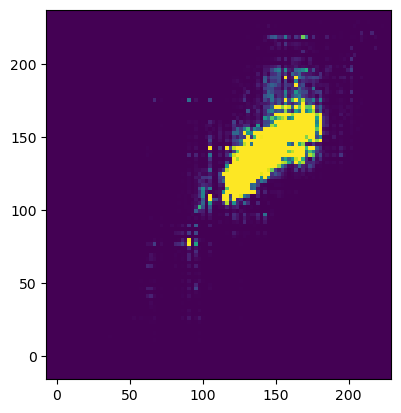

In [27]:
plt.imshow(heatmap.T, extent = extent, origin='lower', vmin = 0, vmax = 10000)
plt.show()

## Testing

In [17]:
#np.unique(xr.where(bvy1823 == 2023, wy2223, np.nan) - xr.where(bvy1823 == 2023, bv1823, np.nan), return_counts = True)

In [18]:
#xr.where(bvy1823 == 2023, wy2223, np.nan)#.plot()

In [19]:
#xr.where(bvy1823 == 2023, bv1823, np.nan)#.plot()

In [20]:
#xr.where(bvy1823 == 2023, np.nan, bv1823).plot()

In [21]:
#(xr.where(bvy1823 == 2023, np.nan, bv1823) - xr.where(bvy1823 == 2023, np.nan, wy2223)).rio.to_raster('test.tif')